In [ ]:
# SPLIT DATASET INTO 80% TRAINING AND 20% TEST
import glob
from math import floor
import shutil
import os
import random
random.seed = 1

# files=['a', 'b', 'c','d','e', 'f', 'g']

for parking_id in ['UFPR04', 'UFPR05', 'PUCPR']:
    for weather in ['Sunny', 'Cloudy', 'Rainy']:

        path = f'E://Documents//PKLot//PKLot//PKLot/\PKLot\\{parking_id}\\{weather}'
        files = glob.glob(path + '/**/*.jpg', recursive=True)

        num = floor(len(files)*0.8)
        print(num)
        files_training = random.sample(files, num)
        files_test = list(set(files) - set(files_training))

        spaces_training = [file.replace('.jpg', '.xml')
                                for file in files_training]
        
        spaces_test = [file.replace('.jpg', '.xml') for file in files_test]
        
        
        for ft, st in zip(files_training, spaces_training):
            if os.path.exists(ft) and os.path.exists(st):
                dst = f'E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset\\training\\{parking_id}\\{weather}'
                shutil.copy(ft, dst)
                shutil.copy(st, dst)
            
        for ft, st in zip(files_test, spaces_test):
            if os.path.exists(ft) and os.path.exists(st):
                dst = f'E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset\\test\\{parking_id}\\{weather}'
                shutil.copy(ft, dst)
                shutil.copy(st, dst)


        # print(f'{len(files)} total. {len(files_training)} training. {len(files_test)} test.')
# print(files_test)


In [10]:
import os
import shutil
import pandas as pd

src_dir = "E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot"
dst_dir = "E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset"

# Clean destination folder
shutil.rmtree(dst_dir, ignore_errors=True)
os.makedirs(os.path.join(dst_dir, "training"))
os.makedirs(os.path.join(dst_dir, "test"))

parkings = ["PUCPR", "UFPR04", "UFPR05"]
weathers = ["Sunny", "Cloudy", "Rainy"]

data = []
for parking in parkings:
    for weather in weathers:
        path = os.path.join(src_dir, parking, weather)
        days = os.listdir(path)

        total_spaces = 100 if parking == "PUCPR" else (28 if parking == "UFPR04" else 45)
        train_count, test_count = 0, 0

        for day in days:
            files = os.listdir(os.path.join(path, day))
            images = [f for f in files if f.endswith(".jpg")]

            if len(images) == 0:
                continue

            train_images = images[:int(len(images)*0.8)] # 80%
            test_images = images[int(len(images)*0.8):]  # 20%
            
            for image in train_images:
                src_img = os.path.join(path, day, image)
                src_xml = os.path.join(path, day, image[:-4] + ".xml")
                dst_img = os.path.join(dst_dir, "training", parking, weather, image)
                dst_xml = os.path.join(dst_dir, "training", parking, weather, image[:-4] + ".xml")
                os.makedirs(os.path.dirname(dst_img), exist_ok=True)
                try:
                    shutil.copy2(src_img, dst_img)
                    shutil.copy2(src_xml, dst_xml)
                    train_count += 1
                except FileNotFoundError:
                    continue
                

            for image in test_images:
                src_img = os.path.join(path, day, image)
                src_xml = os.path.join(path, day, image[:-4] + ".xml")
                dst_img = os.path.join(dst_dir, "test", parking, weather, image)
                dst_xml = os.path.join(dst_dir, "test", parking, weather, image[:-4] + ".xml")
                os.makedirs(os.path.dirname(dst_img), exist_ok=True)
                try:
                    shutil.copy2(src_img, dst_img)
                    shutil.copy2(src_xml, dst_xml)
                    test_count += 1
                except FileNotFoundError:
                    continue

        data.append({"Parking": parking, "Weather": weather, "Training imgs": train_count, "Test imgs": test_count, "Training spaces": train_count*total_spaces, "Test spaces": test_count*total_spaces, "Train-test ratio": train_count/test_count if test_count != 0 else "Inf"})

df = pd.DataFrame(data)
# set the styles for the table
styles = [{'selector': 'th',
           'props': [('text-align', 'center')]},
          {'selector': 'td',
           'props': [('text-align', 'center')]},
          {'selector': 'thead th:nth-of-type(7)',
           'props': [('vertical-align', 'top'), ('text-align', 'left')]},
          {'selector': 'tbody td:nth-of-type(7)',
           'props': [('vertical-align', 'top'), ('text-align', 'left')]}]

# set the styles to the table and display it
df.style.set_table_styles(styles)
print(df)


  Parking Weather  Training imgs  Test imgs  Training spaces  Test spaces  \
0   PUCPR   Sunny           1843        471           184300        47100   
1   PUCPR  Cloudy           1059        269           105900        26900   
2   PUCPR   Rainy            662        169            66200        16900   
3  UFPR04   Sunny           1669        429            46732        12012   
4  UFPR04  Cloudy           1120        288            31360         8064   
5  UFPR04   Rainy            224         61             6272         1708   
6  UFPR05   Sunny           1989        511            89505        22995   
7  UFPR05  Cloudy           1133        293            50985        13185   
8  UFPR05   Rainy            177         49             7965         2205   

   Train-test ratio  
0          3.912951  
1          3.936803  
2          3.917160  
3          3.890443  
4          3.888889  
5          3.672131  
6          3.892368  
7          3.866894  
8          3.612245  


In [14]:
df = pd.DataFrame(data)
# set the styles for the table
styles = [{'selector': 'th',
           'props': [('text-align', 'center')]},
          {'selector': 'td',
           'props': [('text-align', 'center')]},
          {'selector': 'thead th:nth-of-type(7)',
           'props': [('vertical-align', 'top'), ('text-align', 'left')]},
          {'selector': 'tbody td:nth-of-type(7)',
           'props': [('vertical-align', 'top'), ('text-align', 'left')]}]

# set the styles to the table and display it
df.style.set_table_styles(styles)
print(df)


  Parking Weather  Training imgs  Test imgs  Training spaces  Test spaces  \
0   PUCPR   Sunny           1843        471           184300        47100   
1   PUCPR  Cloudy           1059        269           105900        26900   
2   PUCPR   Rainy            662        169            66200        16900   
3  UFPR04   Sunny           1669        429            46732        12012   
4  UFPR04  Cloudy           1120        288            31360         8064   
5  UFPR04   Rainy            224         61             6272         1708   
6  UFPR05   Sunny           1989        511            89505        22995   
7  UFPR05  Cloudy           1133        293            50985        13185   
8  UFPR05   Rainy            177         49             7965         2205   

   Train-test ratio  
0          3.912951  
1          3.936803  
2          3.917160  
3          3.890443  
4          3.888889  
5          3.672131  
6          3.892368  
7          3.866894  
8          3.612245  


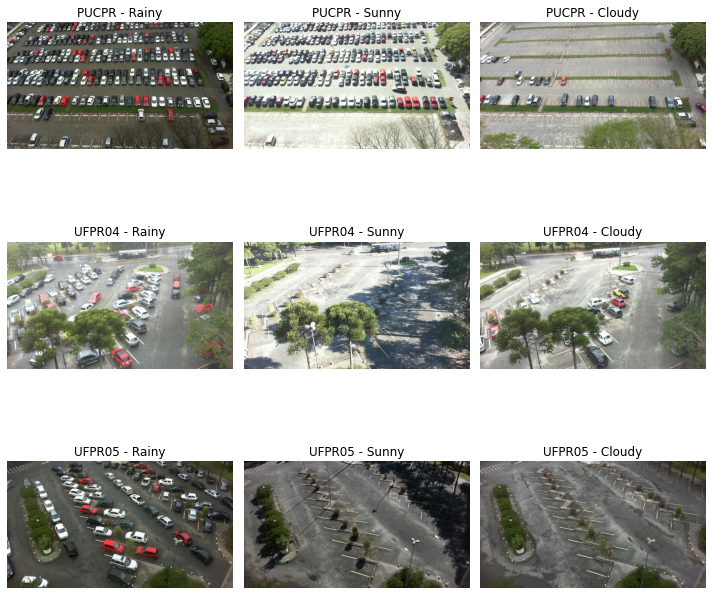

In [30]:
import matplotlib.pyplot as plt
import os
import random

# Define the root directory and parking directories
root_dir = "E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset\\training"
parking_dirs = ["PUCPR", "UFPR04", "UFPR05"]
weather_dirs = ["Rainy", "Sunny", "Cloudy"]


# Create a 3x3 subplot
fig, ax = plt.subplots(3, 3, figsize=(10,10))

# Loop through each parking directory and weather directory to plot a sample image
for i, parking_dir in enumerate(parking_dirs):
    for j, weather_dir in enumerate(weather_dirs):
        # Get a list of all the image files in the directory
        image_files = os.listdir(os.path.join(root_dir, parking_dir, weather_dir))
        # Choose a random image file with extension .jpg from the list
        image_file = random.choice([f for f in image_files if f.endswith(".jpg")])
        # Load and plot the image
        img = plt.imread(os.path.join(root_dir, parking_dir, weather_dir, image_file))
        ax[i, j].imshow(img)
        ax[i, j].axis("off")
        ax[i, j].set_title(f"{parking_dir} - {weather_dir}")
plt.tight_layout()
plt.show()



In [34]:
import xml.etree.ElementTree as ET
import cv2
import numpy as np

# Load the XML file
tree = ET.parse('E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset\\test\\UFPR05\\Sunny\\2013-02-22_15_40_10.xml')
root = tree.getroot()

# Load the image
img = cv2.imread('E:\\OneDrive - UNIVERSIDAD DE HUELVA\\TFG\\VisionParkDetect\\dataset\\test\\UFPR05\\Sunny\\2013-02-22_15_40_10.jpg')

# Draw the contours for each parking space
for space in root.findall('.//space'):
    # Extract space ID and occupied status
    space_id = int(space.get('id'))
    occupied = int(space.get('occupied'))

    # Extract the contours
    contour_points = space.find('.//contour').findall('.//point')
    contours = np.array([[int(p.get('x')), int(p.get('y'))] for p in contour_points])

    # Draw the contours with the appropriate color and space ID
    color = (0, 0, 255) if occupied else (0, 255, 0)
    cv2.drawContours(img, [contours], 0, color, 2)
    cv2.putText(img, str(space_id), tuple(contours.mean(axis=0).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image
cv2.imshow('Parking', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


KeyboardInterrupt: 